In [2]:
print("hello world")

hello world


In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length, petal width
y = (iris.target == 0).astype(int) # Iris Setosa?
per_clf = Perceptron()
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])

In [4]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# 1. Load and Prepare Data
iris = load_iris()
X = iris.data  # All 4 features
y = iris.target # 3 classes (0, 1, 2)

# Split into training and testing sets
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

# 2. Build the DNN Model (Keras version of your DNNClassifier)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),           # Iris has 4 input features
    tf.keras.layers.Dense(30, activation='relu'), # First hidden layer: 30
    tf.keras.layers.Dense(10, activation='relu'), # Second hidden layer: 10
    tf.keras.layers.Dense(3, activation='softmax') # 3 output classes
])

# 3. Compile
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# 4. Train the model
model.fit(train_x, train_y, epochs=50, batch_size=8)

# 5. Evaluate
model.evaluate(test_x, test_y)

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6667 - loss: 1.1722
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7833 - loss: 0.8726
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7500 - loss: 0.8039
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8250 - loss: 0.7499
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8750 - loss: 0.7017
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8500 - loss: 0.6545
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8250 - loss: 0.6109 
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8167 - loss: 0.5778
Epoch 9/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8750 - loss: 0.5451
Epoch 10/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9167 - loss: 0.5156
Epoch 11/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9583 - loss: 0.4867
Epoch 12/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9250 - l

[0.18856757879257202, 0.9666666388511658]

In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 30)             │           150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,481 (5.79 KB)

 Trainable params: 493 (1.93 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 988 (3.86 KB)

In [6]:
X_new = test_x[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


array([[0.  , 0.2 , 0.8 ],
       [1.  , 0.  , 0.  ],
       [0.01, 0.87, 0.12]], dtype=float32)

In [7]:
import numpy as np

# 1. Get the probability distributions
y_probs = model.predict(X_new)

# 2. Get the index of the class with the highest probability
y_pred = np.argmax(y_probs, axis=1)

print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[2 0 1]


In [ ]:
np.array(class_names)[y_pred]

In [5]:
import tensorflow as tf 
from tensorflow import keras
tf.__version__


'2.20.0'

In [6]:
keras.__version__

'3.13.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype

dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [12]:
class_names[y_train[0]]

'Coat'

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
from keras.layers import Dense
output_layer = Dense(10)

In [15]:
from tensorflow.keras.layers import Dense
output_layer = Dense(10)

In [16]:
from tensorflow import keras
output_layer = keras.layers.Dense(10)

In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [19]:
model.layers[1].name

'dense_3'

In [20]:
model.get_layer('dense_3').name

'dense_3'

In [21]:
hidden1 = model.get_layer('dense_3')
weights, biases = hidden1.get_weights()
weights

array([[ 0.04013718,  0.04555668,  0.07159157, ...,  0.02355032,
        -0.00799883,  0.06841739],
       [-0.04357509, -0.05681074,  0.03031174, ..., -0.05171283,
         0.02314784, -0.04386412],
       [-0.01669925,  0.06704843,  0.05029161, ..., -0.01998279,
        -0.02977215, -0.00457041],
       ...,
       [ 0.06614105, -0.02317239,  0.03643286, ...,  0.00300089,
         0.01495837, -0.00967497],
       [-0.01084883,  0.02809124,  0.0724676 , ...,  0.04175314,
         0.04201072, -0.06104633],
       [ 0.00876131,  0.03436881, -0.0502904 , ..., -0.03897656,
         0.01540978,  0.04163167]], shape=(784, 300), dtype=float32)

In [22]:
weights.shape

(784, 300)

In [23]:
biases.shape

(300,)

In [24]:
model.compile(loss="sparse_categorical_crossentropy",
optimizer="sgd",
metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7615 - loss: 0.7254 - val_accuracy: 0.8192 - val_loss: 0.5267
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8286 - loss: 0.4928 - val_accuracy: 0.8334 - val_loss: 0.4708
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8436 - loss: 0.4473 - val_accuracy: 0.8584 - val_loss: 0.4198
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8532 - loss: 0.4195 - val_accuracy: 0.8460 - val_loss: 0.4512
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.8603 - loss: 0.3982 - val_accuracy: 0.8680 - val_loss: 0.3874
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8657 - loss: 0.3814 - val_accuracy: 0.8648 - val_loss: 0.3876
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8695 - loss: 0.3691 - val_accuracy: 0.8734 - val_loss: 0.3646
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8739 - loss:

In [26]:
import tensorflow as tf
from tensorflow import keras

# Load the dataset (example using Fashion MNIST)
mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

# Create validation set and scale pixel intensities to 0-1 range
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [27]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9191 - loss: 0.2256 - val_accuracy: 0.8942 - val_loss: 0.2910
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9211 - loss: 0.2217 - val_accuracy: 0.8916 - val_loss: 0.2895
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9213 - loss: 0.2181 - val_accuracy: 0.8930 - val_loss: 0.2888
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9231 - loss: 0.2138 - val_accuracy: 0.8896 - val_loss: 0.2945
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9238 - loss: 0.2118 - val_accuracy: 0.8868 - val_loss: 0.3020
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9251 - loss: 0.2077 - val_accuracy: 0.8892 - val_loss: 0.3021
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9266 - loss: 0.2046 - val_accuracy: 0.8960 - val_loss: 0.2865
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9271 - loss: 0.2012

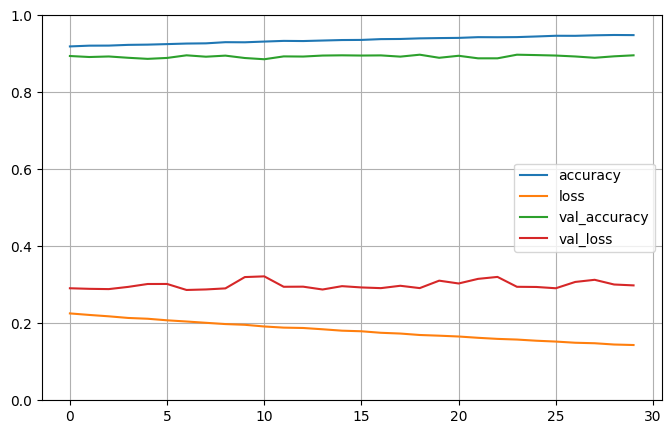

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [29]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8372 - loss: 82.1070


[82.1070327758789, 0.8371999859809875]

In [30]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
import numpy as np

# 1. Get the probability distributions
y_probs = model.predict(X_new)

# 2. Get the index of the class with the highest probability
y_pred = np.argmax(y_probs, axis=1)

print(y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
[9 2 1]


In [34]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [35]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)